In [15]:
# Importing the Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [16]:
# Taking Required Inputs from the User
k = float(input('Enter the Value of the Spring Constant (k): '))
m = float(input('Enter the Mass (m): '))
c = float(input('Enter the Damping Coefficient (c): '))
alpha = float(input('Enter the Required Value of alpha to use in the Euler Method to Solve the Equation: '))
del_t = float(input('Enter the Required Time Step Size (del t): '))
t_i = float(input('Enter the Initial Time (Ti): '))
t_f = float(input('Enter the Final Time (Tf): '))
x_0 = float(input('Enter the Position at Time Ti ie Initial Condition 1 (x0): '))
x_dot_0 = float(input('Enter the Velocity at Time Ti ie Initial Condition 2 (v0): '))

Enter the Value of the Spring Constant (k): 6.25
Enter the Mass (m): 1
Enter the Damping Coefficient (c): 1
Enter the Required Value of alpha to use in the Euler Method to Solve the Equation: 0.5
Enter the Required Time Step Size (del t): 0.01
Enter the Initial Time (Ti): 0
Enter the Final Time (Tf): 20
Enter the Position at Time Ti ie Initial Condition 1 (x0): 1
Enter the Velocity at Time Ti ie Initial Condition 2 (v0): 1


In [17]:
# A Modular Subroutine to Calculate f(t). Kept as 0 for now.
def f(t):
  return 0

In [18]:
# A Function to solve a Differential Equation using Euler's Method
def eulers_method(k,m,c,alpha,del_t,t_i,t_f,x_0,x_dot_0):
  timesteps = np.arange(t_i, t_f + del_t, del_t)
  x_values = np.zeros(len(timesteps))
  x_values[0] = x_0
  x_dot_values = np.zeros(len(timesteps))
  x_dot_values[0] = x_dot_0
  x_dot_dot_values = np.zeros(len(timesteps))
  x_dot_dot_values[0] = (-k/m)*x_0 + (-c/m)*x_dot_0 + f(timesteps[0])
  for i in range(1,len(timesteps)): 
    denom_dot = 1/(1 + (c/m)*alpha*del_t)
    denom = 1/(1 + (alpha**2)*(del_t**2)*(k/(m*denom_dot)))
    x_values[i] = denom*(x_values[i-1] + (1-alpha)*del_t*x_dot_values[i-1] + denom_dot*(alpha*del_t*x_dot_values[i-1] + alpha*(1-alpha)*(del_t**2)*x_dot_dot_values[i-1] + ((alpha*del_t)**2)*(f(timesteps[i])/m)))
    x_dot_values[i] = denom_dot*(x_dot_values[i-1] + (1-alpha)*del_t*x_dot_dot_values[i-1] + (-alpha/m)*k*del_t*x_values[i] + (alpha/m)*del_t*f(timesteps[i]))
    x_dot_dot_values[i] = (-1/m)*(k*x_values[i] + c*x_dot_values[i] - f(timesteps[i]))
  return x_values

In [19]:
# A Function to solve the Homogenous Spring Mass Equation using Analytical Techniques
def analytical_method(k,m,c,del_t,t_i,t_f,x_0,x_dot_0):
  timesteps = np.arange(t_i, t_f + del_t, del_t)
  zeta = c/(2*math.sqrt(m*k))
  w_n = math.sqrt(k/m)
  w_d = w_n*math.sqrt(1-zeta**2)
  A = (x_dot_0 + zeta*w_n*x_0)/w_d
  B = x_0
  solution = []
  for t in timesteps:
    value = (math.exp(-zeta*w_n*t))*(A*math.sin(w_d*t) + B*math.cos(w_d*t))
    solution.append(value)
  return np.array(solution)

In [20]:
# Plotting the Curve Generated By Euler's and Analytical Method for the Set of Conditions Used at Given Initial Conditions
def compare_homogenous_solution():
  timesteps = np.arange(t_i, t_f + del_t, del_t)
  eulers = eulers_method(k,m,c,alpha,del_t,t_i,t_f,x_0,x_dot_0)
  analytical = analytical_method(k,m,c,del_t,t_i,t_f,x_0,x_dot_0)
  fig, axs = plt.subplots(3)
  fig.tight_layout()
  axs[0].plot(timesteps, eulers)
  axs[0].set_title('Eulers Solution')
  axs[1].plot(timesteps, analytical)
  axs[1].set_title('Analytical Solution')
  axs[2].plot(timesteps, eulers)
  axs[2].plot(timesteps, analytical)
  axs[2].set_title('Both Solutions Compared')
  plt.savefig('Eulers_Analytical_Homogenous_Case')
  plt.show()


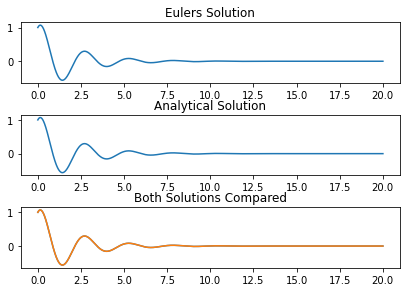

In [21]:
compare_homogenous_solution()

Analysis For the Plots Obtained Above <br>
The initial values of k, m, & c have been chosen so that zeta < 1, thus indicating an underdamped case, clearly reflecting in all the plots. <br>
Further, both the curves when plotted against eachother look almost identical attributing to both the reliability of Euler's Method, as well as the small delta t size chosen (0.01).

In [22]:
# Now, for Seeing the Effect of Different del_t step sizes on the Euler's Solution (on the same homogenous case)
def vary_eulers_del_t(k,m,c,alpha,t_i,t_f,x_0,x_dot_0,del_t_list):
  num_plots = len(del_t_list)
  fig, axs = plt.subplots(num_plots)
  fig.tight_layout()
  for i in range(num_plots):
    timesteps = np.arange(t_i, t_f + del_t_list[i], del_t_list[i])
    eulers = eulers_method(k,m,c,alpha,del_t_list[i],t_i,t_f,x_0,x_dot_0)
    axs[i].plot(timesteps, eulers)
    axs[i].set_title('Eulers Solution at del_t = ' + str(del_t_list[i]))
  plt.savefig('Varying_del_t')
  plt.show()

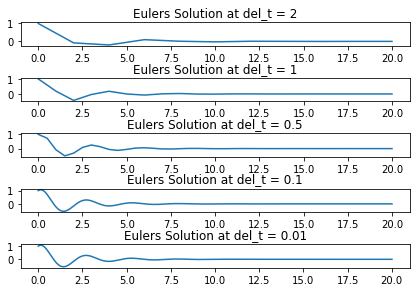

In [23]:
# Plotting at Different del_t Values
del_t_list = [2,1,0.5,0.1,0.01]
vary_eulers_del_t(k,m,c,alpha,t_i,t_f,x_0,x_dot_0,del_t_list)

Analysis For the Plots Obtained Above <br>
As expected, smaller delta t values give rise to more points to calculate from, thus leading to more accurate and smoother plots. This can be verified by observing the trend as we go from the plot with delta t = 2 all the way to the plot with delta t = 0.01.

In [24]:
# Now Seeing the Effect of Changing Alpha
def vary_eulers_alpha(k,m,c,del_t,t_i,t_f,x_0,x_dot_0,alpha_list):
  num_plots = len(alpha_list)
  fig, axs = plt.subplots(num_plots)
  fig.tight_layout()
  for i in range(num_plots):
    timesteps = np.arange(t_i, t_f + del_t, del_t)
    eulers = eulers_method(k,m,c,alpha_list[i],del_t,t_i,t_f,x_0,x_dot_0)
    axs[i].plot(timesteps, eulers)
    axs[i].set_title('Eulers Solution at alpha = ' + str(alpha_list[i]))
  plt.savefig('Varying_alpha')
  plt.show()


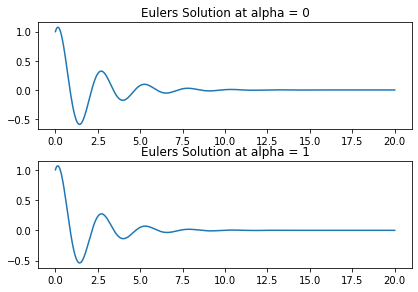

In [25]:
# Plotting at Different Alpha Values
alpha_list = [0,1]
vary_eulers_alpha(k,m,c,del_t,t_i,t_f,x_0,x_dot_0,alpha_list)

Analysis For the Plots Obtained Above <br>
Though both plots look similar because of the range of variables (k, m, c, etc) chosen, there still are minute differences between the two curves. <br>
Both curves (thus both alpha values of 0 & 1) have similar accuracies. However, the initial curve drawn when comparing with the analytical solution was taken at alpha = 05, and had the highest accuracy of all (can also be seen visually as both the curves almost overlapped perfectly). <br>
The stability for the curve where alpha = 1 was taken is slightly higher, which can be observed by just looking at the curve (especially in the horizontal line part, ie > 7.5 around). The stability definition used here is based off the standard formula of |Yn+1|/|Yn| < 1 signifying stability.

In [26]:
# Verifying the Non-Homogenous Case by Assuming x(t) = 1 + Sin(w*t)
# Using the Trick, when x(t) = Sin(w*t), f(t) = Sin(w*t)[k - m*w^2] + c*w_n*Cos(w*t) + k
# Thus defining a new f(t) function

w = 1 # So that v(0) = 0, as per the initial conditions assumed initially

def x(t):
  return 1 + math.sin(w*t)

def f(t):
  return (k - m*(w**2))*math.sin(w*t) + c*w*math.cos(w*t) + k

In [27]:
# Plotting x(t) = 1 + Sin(w*t) for comparing with the plot obtained above
def compare_non_homogenous_solution():
  timesteps = np.arange(t_i, t_f + del_t, del_t)
  x_t_eulers = eulers_method(k,m,c,alpha,del_t,t_i,t_f,x_0,x_dot_0)
  x_t_actual = []
  for i in range(len(timesteps)):
    x_t_actual.append(x(timesteps[i]))
  x_t_actual = np.array(x_t_actual)
  fig, axs = plt.subplots(3)
  fig.tight_layout()
  axs[0].plot(timesteps, x_t_eulers)
  axs[0].set_title('Eulers Solution')
  axs[1].plot(timesteps, x_t_actual)
  axs[1].set_title('Actual assumed Solution')
  axs[2].plot(timesteps, x_t_eulers)
  axs[2].plot(timesteps, x_t_actual)
  axs[2].set_title('Both Solutions Compared')
  plt.savefig('Eulers_Non_Homogenous_Case')
  plt.show()


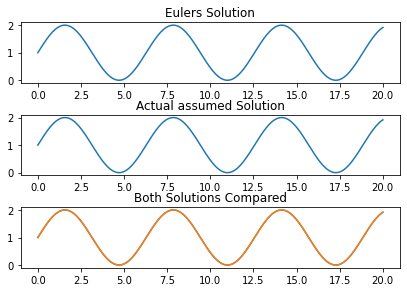

In [28]:
compare_non_homogenous_solution()

Analysis For the Plot Obtained Above <br>
We initially assumed x(t) = 1 + Sin(wt), and substituting this value of x(t) in the spring mass differential equation, we got the value of f(t) we need to use as f(t) = Sin(wt)(k - mw^2) + cwCos(wt) + k. When we use this expression of f(t) back in Euler's Method, we expect the plot we get to be the initial sine curve of x(t) = 1 + Sin(wt) that we started out with.
As can be seen in the plot, the solution obtained is pretty accurate showing sine curve characteristics. The graph is pretty much exactly similar, mimicking the sine curve characteristics assumed initially, thus verifying that the Euler's Method coded works in case of non homogenous cases as well, with the assumption of x(t) = 1+ Sin(wt) for the purpose of demonstration.

The analysis for velocity curves can be done just like position. In that case, in the function that does the euler method ('eulers_method()'), just return the 'x_dot_values' array and plot that to get curve. Same goes for plotting acceleration, where we would then have to return and plot 'x_dot_dot_values' against time.